--------------------------------------------------------------------------------------------------------------------------------
# Nearest Neighbors using scikit learn


--------------------------------------------------------------------------------------------------------------------------------
#### Things you would learn:

    Use of Nearest Neighbours

    Use of various functions within Nearest Neighbours (k-neigh, radius)

    Use of colour maps for plotting

    Use of Ravel and np.c functions ( Flattening and joining arrays)

    Plotting Nearest Neighbours using meshgrid 

    Function deconstruction ( step by step) 
    
    
##### Duration of excercise : 45min - 90min

--------------------------------------------------------------------------------------------------------------------------------

Adapted from: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

First we would try the following methods used in Nearest Neighbours

In [1]:
from sklearn.neighbors import NearestNeighbors

In [2]:
samples = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]



In [3]:
samples

[[0, 0, 2], [1, 0, 0], [0, 0, 1]]

In [4]:
neigh = NearestNeighbors(2, 0.4)  # Where n_neighbours =2 , Radius = 0.4
print(neigh)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=0.4)


In [5]:
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=0.4)

Refer to : http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [6]:

neigh.kneighbors([[0, 0, 1.3]], 2, return_distance=False)  # kneighbors(X= Array, n_neighbors=22, return_distance= False)



array([[2, 0]], dtype=int64)

In [7]:
neigh.radius_neighbors([[0, 0, 1.3]], 0.4, return_distance=True)   # radius_neighbors(X=None, radius=None, return_distance=True)
#print(np.asarray(rng[0][0]))

(array([array([ 0.3])], dtype=object),
 array([array([2], dtype=int64)], dtype=object))

In [8]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]

In [9]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

In [10]:
neigh.kneighbors([[1., 1., 1.]])

(array([[ 0.5]]), array([[2]], dtype=int64))

#### Nearest Neighbors Classification


In [11]:
# importing the required packages

import numpy as np
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt


In [12]:
n_neighbors = 15

iris = datasets.load_iris()

# Considering only first two features

X = iris.data[:, :2]
print(X)
y = iris.target
print(y)

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

In [13]:
# Color maps 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['red', 'blue', 'green'])


In [14]:
%matplotlib inline 
plt.figure()
plt.show()

In [15]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max),              # Return coordinate matrices from coordinate vectors
                         np.arange(y_min, y_max))
print('x_min',x_min,'x_max',x_max,'y_min',y_min,'y_max',y_max)

#xx.ravel()  # Returns a flattened array Ex : array([-2.56873522, -2.54873522, -2.52873522, ...,  2.73126478, 2.75126478,  2.77126478])
# np.c_()    # Concates the two arrays  Ex: [1,2,3] [4,5,6] ,np_c = [1,4],[2, 5],[3, 6]])

print(xx)
print(yy)

x_min 3.3 x_max 8.9 y_min 1.0 y_max 5.4
[[ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]
 [ 3.3  4.3  5.3  6.3  7.3  8.3]]
[[ 1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  5.]]


In [17]:
#Flatteing the array
mo = xx.ravel()
no= yy.ravel()
print(mo)
print(no)

[ 3.3  4.3  5.3  6.3  7.3  8.3  3.3  4.3  5.3  6.3  7.3  8.3  3.3  4.3  5.3
  6.3  7.3  8.3  3.3  4.3  5.3  6.3  7.3  8.3  3.3  4.3  5.3  6.3  7.3  8.3]
[ 1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.]


In [19]:
# Concating the array 

pp = np.c_[xx.ravel(),yy.ravel()]
pp

array([[ 3.3,  1. ],
       [ 4.3,  1. ],
       [ 5.3,  1. ],
       [ 6.3,  1. ],
       [ 7.3,  1. ],
       [ 8.3,  1. ],
       [ 3.3,  2. ],
       [ 4.3,  2. ],
       [ 5.3,  2. ],
       [ 6.3,  2. ],
       [ 7.3,  2. ],
       [ 8.3,  2. ],
       [ 3.3,  3. ],
       [ 4.3,  3. ],
       [ 5.3,  3. ],
       [ 6.3,  3. ],
       [ 7.3,  3. ],
       [ 8.3,  3. ],
       [ 3.3,  4. ],
       [ 4.3,  4. ],
       [ 5.3,  4. ],
       [ 6.3,  4. ],
       [ 7.3,  4. ],
       [ 8.3,  4. ],
       [ 3.3,  5. ],
       [ 4.3,  5. ],
       [ 5.3,  5. ],
       [ 6.3,  5. ],
       [ 7.3,  5. ],
       [ 8.3,  5. ]])

In [16]:

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
clf    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

In [17]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z    

array([0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2])

In [18]:
Z = Z.reshape(xx.shape)
Z

array([[0, 1, 1, 1, 2, 2],
       [0, 0, 1, 1, 2, 2],
       [0, 0, 1, 2, 2, 2],
       [0, 0, 0, 2, 2, 2],
       [0, 0, 0, 0, 2, 2]])

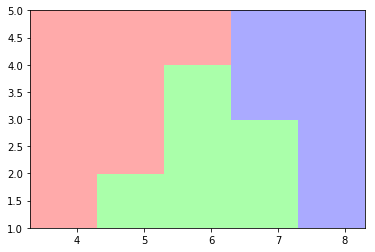

In [19]:
% matplotlib inline
pl.figure()
pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

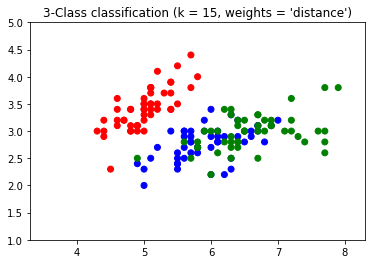

In [20]:
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlim(xx.min(),xx.max())
pl.ylim(yy.min(), yy.max())
pl.title("3-Class classification (k = %i, weights = '%s')"
             % (n_neighbors, weights))
pl.show()

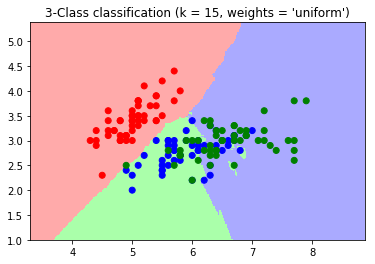

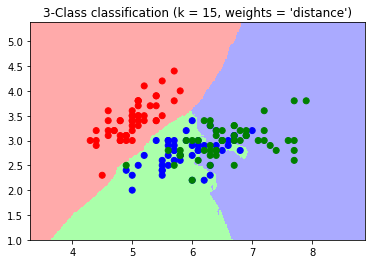

In [21]:
# Complete function 

%matplotlib inline
h = .02 
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title("3-Class classification (k = %i, weights = '%s')"
             % (n_neighbors, weights))